In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
from matplotlib.collections import PatchCollection
import cv2
import copy

## Use gabor filter

In [12]:
FILENAME1 = 'square.jpg'
FILENAME2 = 'triangle.jpg'

In [8]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters
 

def process1(img, filters):
    kern = filters[4]
    fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)

    img1 = copy.deepcopy(fimg)
    img1[img1<200] = 0
    #plt.imshow(img1)
    plt.imshow(img1, cmap='gray')
       
    return img1, np.sum(img1)

def get_shape(filename):
    img = cv2.imread(filename, 0)
    filters = build_filters()
    img1, sum1 = process1(img, filters)
    
    if(sum1>100000):
        return 'triangle'
    else:
        return 'square'

'triangle'

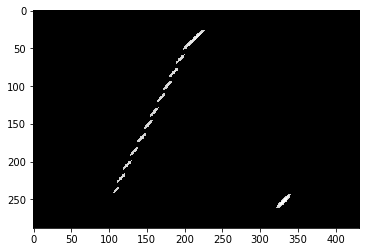

In [9]:
get_shape('size-5-conjunction-0.jpg')

'square'

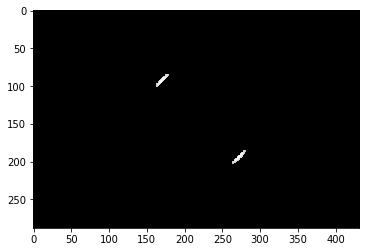

In [10]:
get_shape('square.jpg')

'triangle'

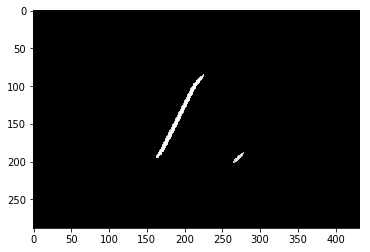

In [11]:
#create_gabor_image('square.jpg')
get_shape('triangle.jpg')